In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("accepted_2007_to_2018Q4.csv", low_memory=False)



In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [4]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [5]:
use_cols = [
    "loan_amnt", "term", "int_rate", "installment", "purpose",
    "emp_length", "home_ownership", "annual_inc", "dti",
    "addr_state",
    "fico_range_low", "fico_range_high",
    "inq_last_6mths", "open_acc", "total_acc",
    "revol_bal", "revol_util", "earliest_cr_line",
    "tot_cur_bal", "avg_cur_bal",
    "loan_status"  
]

df = df[use_cols].copy()
df.head()

,loan_amnt,term,int_rate,installment,purpose,emp_length,home_ownership,annual_inc,dti,addr_state,...,fico_range_high,inq_last_6mths,open_acc,total_acc,revol_bal,revol_util,earliest_cr_line,tot_cur_bal,avg_cur_bal,loan_status
0,3600.0,36 months,13.99,123.03,debt_consolidation,10+ years,MORTGAGE,55000.0,5.91,PA,...,679.0,1.0,7.0,13.0,2765.0,29.7,Aug-2003,144904.0,20701.0,Fully Paid
1,24700.0,36 months,11.99,820.28,small_business,10+ years,MORTGAGE,65000.0,16.06,SD,...,719.0,4.0,22.0,38.0,21470.0,19.2,Dec-1999,204396.0,9733.0,Fully Paid
2,20000.0,60 months,10.78,432.66,home_improvement,10+ years,MORTGAGE,63000.0,10.78,IL,...,699.0,0.0,6.0,18.0,7869.0,56.2,Aug-2000,189699.0,31617.0,Fully Paid
3,35000.0,60 months,14.85,829.90,debt_consolidation,10+ years,MORTGAGE,110000.0,17.06,NJ,...,789.0,0.0,13.0,17.0,7802.0,11.6,Sep-2008,301500.0,23192.0,Current
4,10400.0,60 months,22.45,289.91,major_purchase,3 years,MORTGAGE,104433.0,25.37,PA,...,699.0,3.0,12.0,35.0,21929.0,64.5,Jun-1998,331730.0,27644.0,Fully Paid


In [6]:
df = pd.get_dummies(df, columns=["purpose", "home_ownership", "addr_state"], drop_first=True)
df.head()


,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,3600.0,36 months,13.99,123.03,10+ years,55000.0,5.91,675.0,679.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,24700.0,36 months,11.99,820.28,10+ years,65000.0,16.06,715.0,719.0,4.0,...,True,False,False,False,False,False,False,False,False,False
2,20000.0,60 months,10.78,432.66,10+ years,63000.0,10.78,695.0,699.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,35000.0,60 months,14.85,829.90,10+ years,110000.0,17.06,785.0,789.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,10400.0,60 months,22.45,289.91,3 years,104433.0,25.37,695.0,699.0,3.0,...,False,False,False,False,False,False,False,False,False,False


In [7]:
default_status = [
    "Charged Off",
    "Default",
    "Does not meet the credit policy. Status: Charged Off",
    "Late (31-120 days)"
]

df["target"] = df["loan_status"].apply(lambda x: 1 if x in default_status else 0)

df = df.drop(columns=["loan_status"])
df["target"].value_counts(normalize=True)


target
0    0.871692
1    0.128308
Name: proportion, dtype: float64

In [8]:
df["term"] = df["term"].str.strip().str.extract(r"(\d+)").astype(float)


df["emp_length"] = df["emp_length"].replace({
    "10+ years": 10,
    "9 years": 9, "8 years": 8, "7 years": 7,
    "6 years": 6, "5 years": 5, "4 years": 4,
    "3 years": 3, "2 years": 2, "1 year": 1,
    "< 1 year": 0
})


df["emp_length"] = df["emp_length"].replace("", np.nan)


df["emp_length"] = df["emp_length"].astype(float)

df["emp_length"] = df["emp_length"].fillna(df["emp_length"].median())


C:\Users\1812a\AppData\Local\Temp\ipykernel_18356\1104355271.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["emp_length"] = df["emp_length"].replace({


In [9]:

df["fico_score"] = (df["fico_range_low"] + df["fico_range_high"]) / 2
df = df.drop(columns=["fico_range_low", "fico_range_high"])



df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format="%b-%Y", errors="coerce")

df["credit_age_months"] = ((pd.to_datetime("today") - df["earliest_cr_line"])
                           .dt.days // 30)

df = df.drop(columns=["earliest_cr_line"])



In [10]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove("target")  

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()


for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [11]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["target"])
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
df.isna().mean().sort_values(ascending=False).head(20)


loan_amnt                     0.0
term                          0.0
int_rate                      0.0
installment                   0.0
emp_length                    0.0
annual_inc                    0.0
dti                           0.0
inq_last_6mths                0.0
open_acc                      0.0
total_acc                     0.0
revol_bal                     0.0
revol_util                    0.0
tot_cur_bal                   0.0
avg_cur_bal                   0.0
purpose_credit_card           0.0
purpose_debt_consolidation    0.0
purpose_educational           0.0
purpose_home_improvement      0.0
purpose_house                 0.0
purpose_major_purchase        0.0
dtype: float64

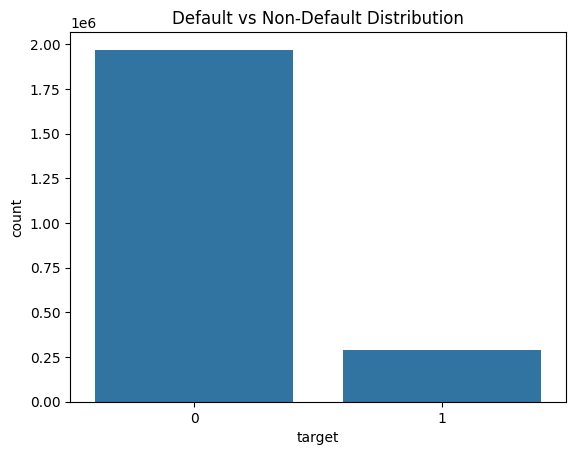

target
0    0.871692
1    0.128308
Name: proportion, dtype: float64

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["target"])
plt.title("Default vs Non-Default Distribution")
plt.show()

df["target"].value_counts(normalize=True)


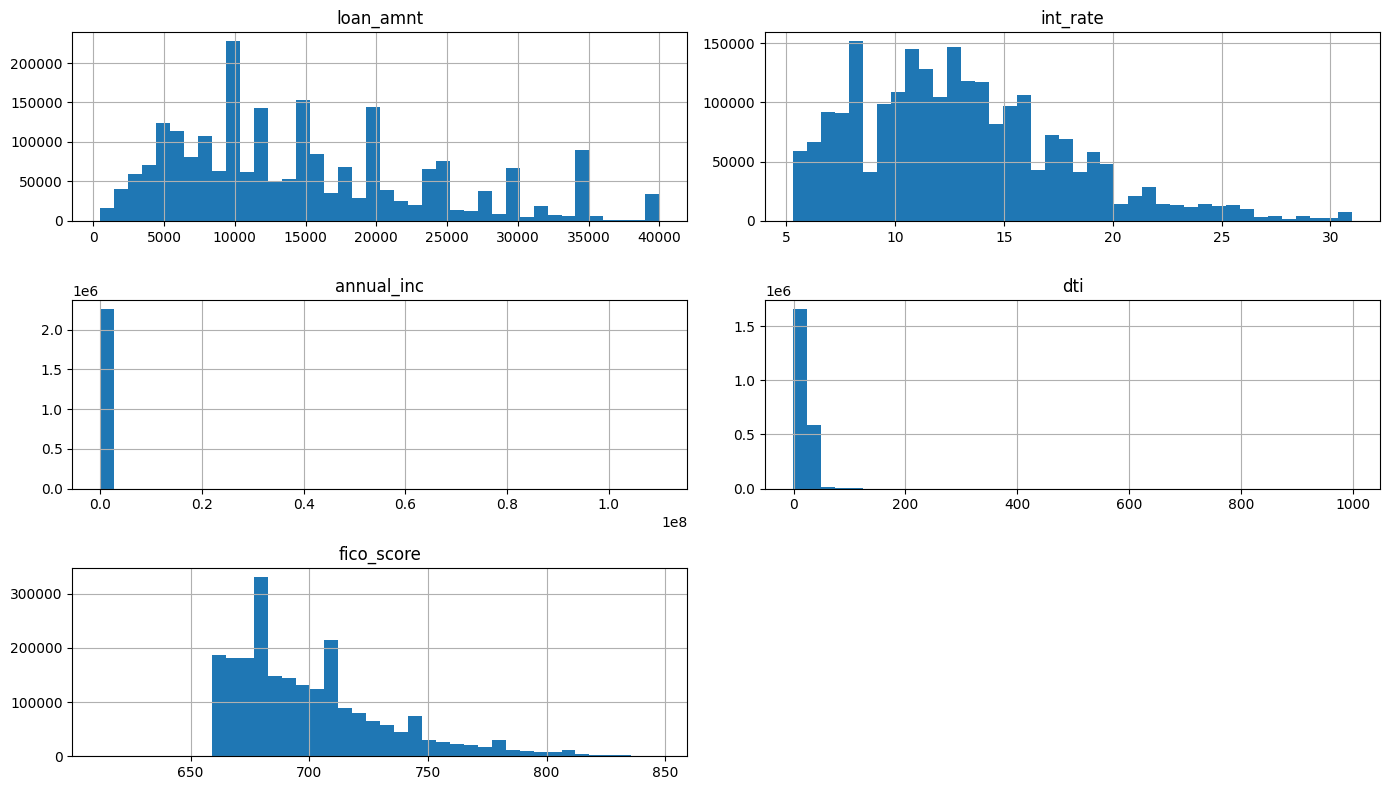

In [15]:
num_cols_plot = ["loan_amnt", "int_rate", "annual_inc", "dti", "fico_score"]

df[num_cols_plot].hist(bins=40, figsize=(14,8))
plt.tight_layout()
plt.show()


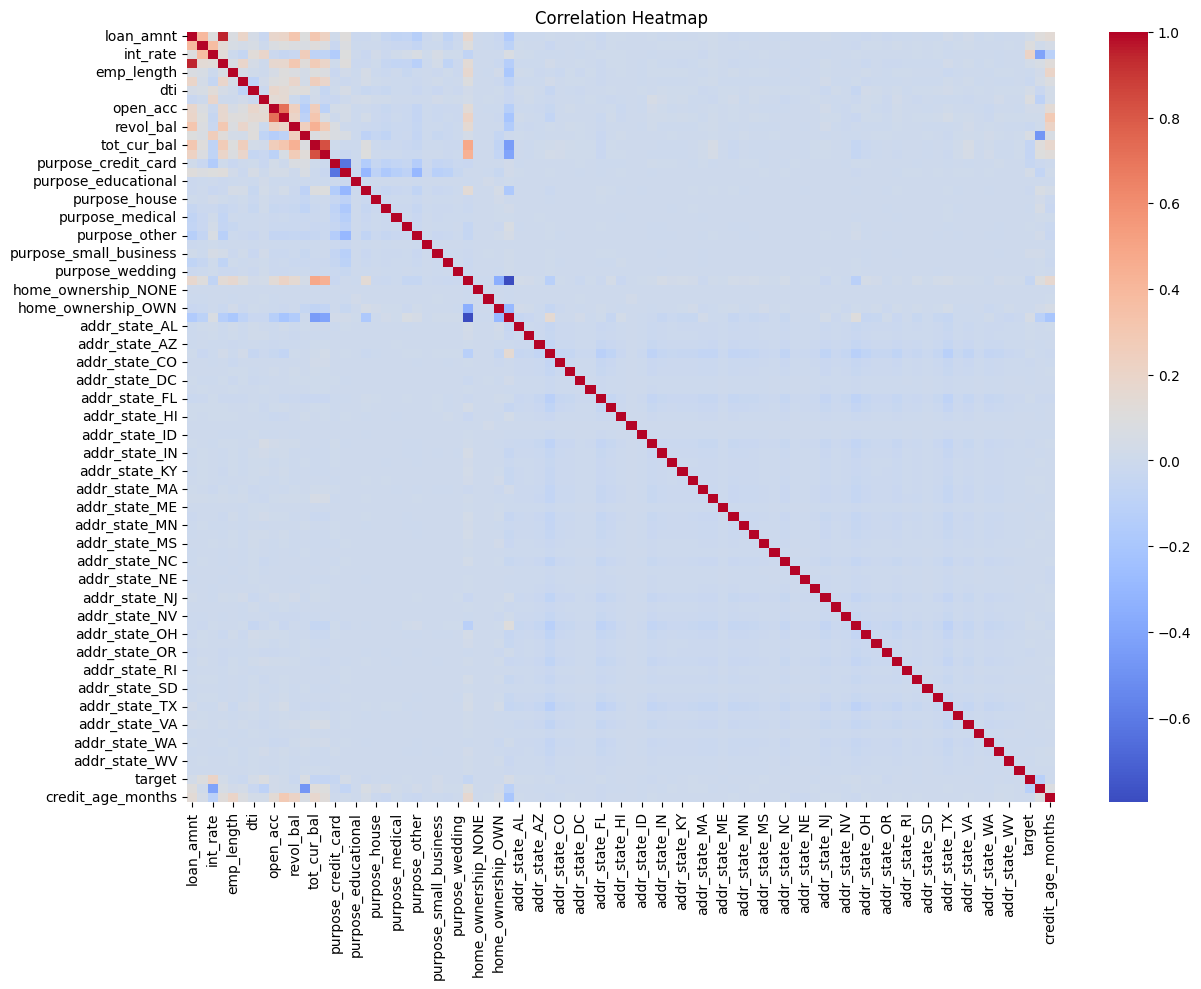

In [16]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


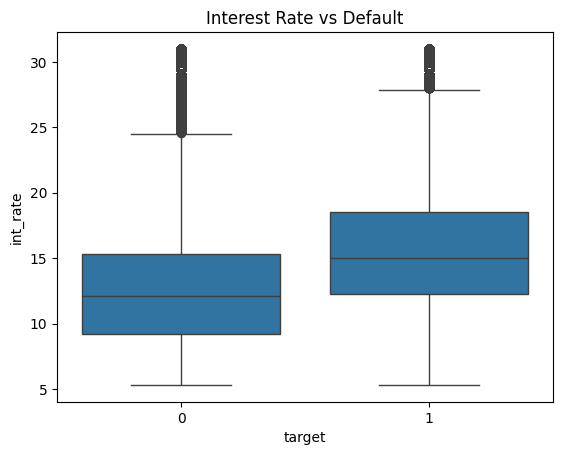

In [17]:
sns.boxplot(x=df["target"], y=df["int_rate"])
plt.title("Interest Rate vs Default")
plt.show()


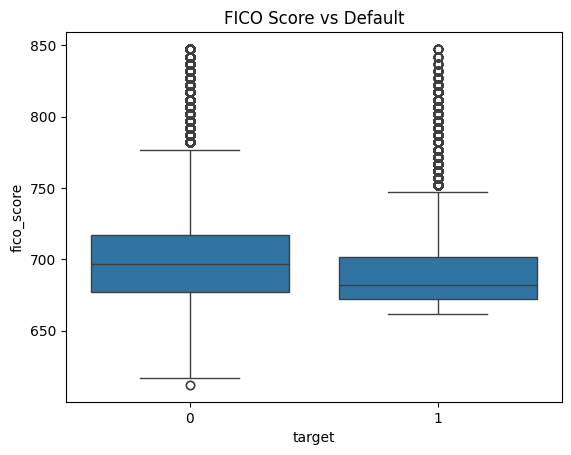

In [18]:
sns.boxplot(x=df["target"], y=df["fico_score"])
plt.title("FICO Score vs Default")
plt.show()


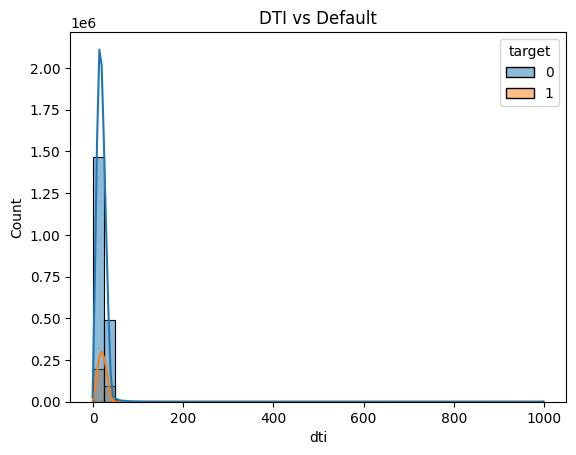

In [19]:
sns.histplot(data=df, x="dti", hue="target", bins=40, kde=True)
plt.title("DTI vs Default")
plt.show()


In [20]:
purpose_rates = {}
for col in df.columns:
    if col.startswith("purpose_"):
        purpose_name = col.replace("purpose_", "")
        purpose_rates[purpose_name] = df[df[col] == 1]["target"].mean()

pd.Series(purpose_rates).sort_values()


credit_card           0.104458
home_improvement      0.112630
wedding               0.118471
major_purchase        0.119794
vacation              0.122319
house                 0.125566
other                 0.129023
educational           0.132075
medical               0.133986
debt_consolidation    0.138910
moving                0.155294
renewable_energy      0.162630
small_business        0.199239
dtype: float64

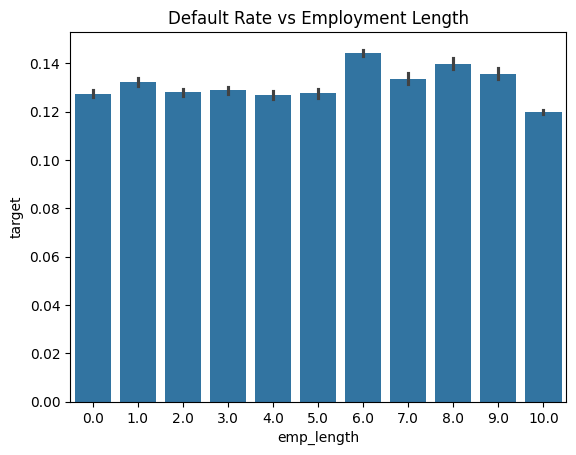

In [21]:
sns.barplot(x=df["emp_length"], y=df["target"])
plt.title("Default Rate vs Employment Length")
plt.show()


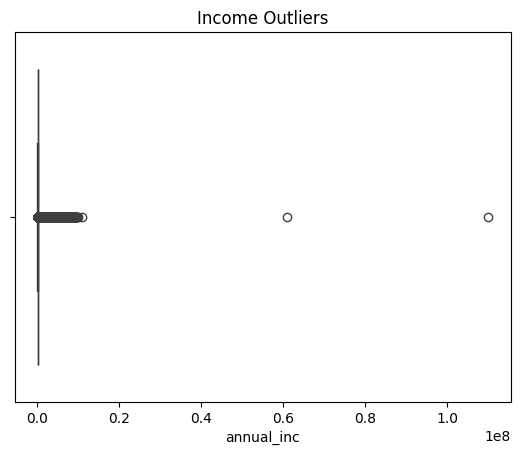

In [22]:
sns.boxplot(x=df["annual_inc"])
plt.title("Income Outliers")
plt.show()


In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [24]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [25]:
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)


In [28]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.out(x)  # raw logits
        return x

input_dim = X_train.shape[1]
model = MLP(input_dim).to(device)

In [29]:
classes = np.array([0,1])
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
pos_weight = torch.tensor(weights[1], dtype=torch.float32).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [30]:
n_epochs = 20

for epoch in range(n_epochs):
    model.train()
    running_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        running_loss += loss.item() * X_batch.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.4f}")

Epoch 1/20, Loss: 0.8359
Epoch 2/20, Loss: 0.8240
Epoch 3/20, Loss: 0.8212
Epoch 4/20, Loss: 0.8192
Epoch 5/20, Loss: 0.8178
Epoch 6/20, Loss: 0.8169
Epoch 7/20, Loss: 0.8161
Epoch 8/20, Loss: 0.8155
Epoch 9/20, Loss: 0.8148
Epoch 10/20, Loss: 0.8143
Epoch 11/20, Loss: 0.8138
Epoch 12/20, Loss: 0.8133
Epoch 13/20, Loss: 0.8132
Epoch 14/20, Loss: 0.8128
Epoch 15/20, Loss: 0.8126
Epoch 16/20, Loss: 0.8122
Epoch 17/20, Loss: 0.8122
Epoch 18/20, Loss: 0.8118
Epoch 19/20, Loss: 0.8116
Epoch 20/20, Loss: 0.8114


In [31]:
model.eval()
y_pred_probs = []
y_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        probs = torch.sigmoid(outputs).cpu().numpy()
        y_pred_probs.extend(probs)
        y_true.extend(y_batch.cpu().numpy())

y_pred_probs = np.array(y_pred_probs)
y_true = np.array(y_true)


y_pred = (y_pred_probs >= 0.5).astype(int)

auc = roc_auc_score(y_true, y_pred_probs)
f1 = f1_score(y_true, y_pred)
print(f"AUC: {auc:.4f}, F1-Score: {f1:.4f}")

AUC: 0.7097, F1-Score: 0.3134


In [32]:
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_probs)
f1_scores = 2*precision*recall/(precision+recall+1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
y_pred_best = (y_pred_probs >= best_threshold).astype(int)
f1_best = f1_score(y_true, y_pred_best)
print(f"Best Threshold: {best_threshold:.4f}, F1-Score at best threshold: {f1_best:.4f}")

Best Threshold: 0.4437, F1-Score at best threshold: 0.3298


In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from d3rlpy.dataset import MDPDataset
from d3rlpy.algos import DiscreteCQLConfig

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
c:\Users\1812a\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
df = df.fillna(0)
df['loan_amnt'] = df['loan_amnt'].astype(np.float32)
df['int_rate'] = df['int_rate'].astype(np.float32)

feature_cols = df.columns.drop('target')


In [35]:
scaler = StandardScaler()
states = scaler.fit_transform(df[feature_cols].values.astype(np.float32))


actions = df['target'].apply(lambda x: 1 if x == 0 else 0).values.reshape(-1, 1).astype(np.int32)


loan_amts = df['loan_amnt'].values
int_rates  = df['int_rate'].values

rewards = np.zeros_like(loan_amts, dtype=np.float32)
approve_mask = (actions.flatten() == 1)
paid_mask    = (df['target'].values == 0)
default_mask = (df['target'].values == 1)


rewards[np.logical_and(approve_mask, paid_mask)] = loan_amts[np.logical_and(approve_mask, paid_mask)] * int_rates[np.logical_and(approve_mask, paid_mask)]
rewards[np.logical_and(approve_mask, default_mask)] = -loan_amts[np.logical_and(approve_mask, default_mask)]


rewards = np.clip(rewards, -1e4, 1e4)
rewards = rewards.reshape(-1, 1)


terminals = np.ones_like(rewards, dtype=bool)


dataset = MDPDataset(
    observations=states,
    actions=actions,
    rewards=rewards,
    terminals=terminals
)


2025-12-12 13:30.22 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(84,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)])
2025-12-12 13:30.22 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2025-12-12 13:30.30 [info     ] Action size has been automatically determined. action_size=2


In [36]:
algo = DiscreteCQLConfig(
    learning_rate=1e-5,
    batch_size=256
).create(device="cpu")  


In [37]:
algo.fit(dataset, n_steps=200000)

policy_actions = algo.predict(states).flatten() 


2025-12-12 13:30.32 [info     ] dataset info                   dataset_info=DatasetInfo(observation_signature=Signature(dtype=[dtype('float32')], shape=[(84,)]), action_signature=Signature(dtype=[dtype('int32')], shape=[(1,)]), reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)]), action_space=<ActionSpace.DISCRETE: 2>, action_size=2)
2025-12-12 13:30.32 [debug    ] Building models...            
2025-12-12 13:30.32 [debug    ] Models have been built.       
2025-12-12 13:30.32 [info     ] Directory is created at d3rlpy_logs\DiscreteCQL_20251212133032
2025-12-12 13:30.32 [info     ] Parameters                     params={'observation_shape': [84], 'action_size': 2, 'config': {'type': 'discrete_cql', 'params': {'batch_size': 256, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': 'none', 'params': {}}, 'compile_graph': False, 'learning_rate': 1e-05, 'optim_factory': {'type': 'adam'

Epoch 1/20: 100%|██████████| 10000/10000 [02:07<00:00, 78.36it/s, loss=8.61e+3, td_loss=8.59e+3, conservative_loss=14.1]


2025-12-12 13:32.40 [info     ] DiscreteCQL_20251212133032: epoch=1 step=10000 epoch=1 metrics={'time_sample_batch': 0.006757226586341858, 'time_algorithm_update': 0.005502225756645203, 'loss': 8607.650850976563, 'td_loss': 8593.545449658202, 'conservative_loss': 14.105401503890754, 'time_step': 0.012576265931129456} step=10000
2025-12-12 13:32.40 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_10000.d3


Epoch 2/20: 100%|██████████| 10000/10000 [02:05<00:00, 79.68it/s, loss=7.77e+3, td_loss=7.65e+3, conservative_loss=122]


2025-12-12 13:34.46 [info     ] DiscreteCQL_20251212133032: epoch=2 step=20000 epoch=2 metrics={'time_sample_batch': 0.006786336898803711, 'time_algorithm_update': 0.005260691118240356, 'loss': 7771.355821142578, 'td_loss': 7649.1157578125, 'conservative_loss': 122.24006370773316, 'time_step': 0.012365748143196105} step=20000
2025-12-12 13:34.46 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_20000.d3


Epoch 3/20: 100%|██████████| 10000/10000 [01:59<00:00, 83.48it/s, loss=5.54e+3, td_loss=5.13e+3, conservative_loss=410]


2025-12-12 13:36.45 [info     ] DiscreteCQL_20251212133032: epoch=3 step=30000 epoch=3 metrics={'time_sample_batch': 0.006429644989967346, 'time_algorithm_update': 0.005085113549232483, 'loss': 5534.028724462891, 'td_loss': 5123.639396679688, 'conservative_loss': 410.3893290245056, 'time_step': 0.011812045049667359} step=30000
2025-12-12 13:36.45 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_30000.d3


Epoch 4/20: 100%|██████████| 10000/10000 [01:59<00:00, 83.88it/s, loss=3.19e+3, td_loss=2.33e+3, conservative_loss=859]


2025-12-12 13:38.45 [info     ] DiscreteCQL_20251212133032: epoch=4 step=40000 epoch=4 metrics={'time_sample_batch': 0.006397245526313782, 'time_algorithm_update': 0.00505955741405487, 'loss': 3192.096248828125, 'td_loss': 2333.248495263672, 'conservative_loss': 858.8477534881591, 'time_step': 0.011753527355194093} step=40000
2025-12-12 13:38.45 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_40000.d3


Epoch 5/20: 100%|██████████| 10000/10000 [02:15<00:00, 73.92it/s, loss=2.25e+3, td_loss=1.15e+3, conservative_loss=1.11e+3]


2025-12-12 13:41.00 [info     ] DiscreteCQL_20251212133032: epoch=5 step=50000 epoch=5 metrics={'time_sample_batch': 0.007267540168762207, 'time_algorithm_update': 0.005695165419578552, 'loss': 2253.2468552612304, 'td_loss': 1145.3425597412108, 'conservative_loss': 1107.9042950042724, 'time_step': 0.013314515376091003} step=50000
2025-12-12 13:41.00 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_50000.d3


Epoch 6/20: 100%|██████████| 10000/10000 [02:15<00:00, 73.80it/s, loss=1.71e+3, td_loss=492, conservative_loss=1.22e+3]


2025-12-12 13:43.16 [info     ] DiscreteCQL_20251212133032: epoch=6 step=60000 epoch=6 metrics={'time_sample_batch': 0.0072713609218597415, 'time_algorithm_update': 0.005719139957427979, 'loss': 1712.1377436645507, 'td_loss': 492.3076753845215, 'conservative_loss': 1219.8300693603517, 'time_step': 0.01333788170814514} step=60000
2025-12-12 13:43.16 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_60000.d3


Epoch 7/20: 100%|██████████| 10000/10000 [02:13<00:00, 75.14it/s, loss=1.51e+3, td_loss=259, conservative_loss=1.25e+3]


2025-12-12 13:45.29 [info     ] DiscreteCQL_20251212133032: epoch=7 step=70000 epoch=7 metrics={'time_sample_batch': 0.0071436507225036625, 'time_algorithm_update': 0.005620429062843323, 'loss': 1511.1206067321777, 'td_loss': 258.46600782470705, 'conservative_loss': 1252.6545994995117, 'time_step': 0.0131021249294281} step=70000
2025-12-12 13:45.29 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_70000.d3


Epoch 8/20: 100%|██████████| 10000/10000 [02:15<00:00, 73.90it/s, loss=1.43e+3, td_loss=172, conservative_loss=1.26e+3]


2025-12-12 13:47.44 [info     ] DiscreteCQL_20251212133032: epoch=8 step=80000 epoch=8 metrics={'time_sample_batch': 0.0072602329730987545, 'time_algorithm_update': 0.005710298275947571, 'loss': 1429.8684590698242, 'td_loss': 171.69594812927247, 'conservative_loss': 1258.1725112976073, 'time_step': 0.013318201518058776} step=80000
2025-12-12 13:47.44 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_80000.d3


Epoch 9/20: 100%|██████████| 10000/10000 [02:14<00:00, 74.22it/s, loss=1.39e+3, td_loss=125, conservative_loss=1.26e+3]


2025-12-12 13:49.59 [info     ] DiscreteCQL_20251212133032: epoch=9 step=90000 epoch=9 metrics={'time_sample_batch': 0.007196311616897583, 'time_algorithm_update': 0.0057183109998703, 'loss': 1387.7644760498047, 'td_loss': 124.73871381607056, 'conservative_loss': 1263.025762689209, 'time_step': 0.013259693098068237} step=90000
2025-12-12 13:49.59 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_90000.d3


Epoch 10/20: 100%|██████████| 10000/10000 [02:13<00:00, 74.75it/s, loss=1.36e+3, td_loss=96.4, conservative_loss=1.26e+3]


2025-12-12 13:52.13 [info     ] DiscreteCQL_20251212133032: epoch=10 step=100000 epoch=10 metrics={'time_sample_batch': 0.007126914596557617, 'time_algorithm_update': 0.005693930268287658, 'loss': 1356.5839361572266, 'td_loss': 96.34272735862731, 'conservative_loss': 1260.2412087219238, 'time_step': 0.013167324900627136} step=100000
2025-12-12 13:52.13 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_100000.d3


Epoch 11/20: 100%|██████████| 10000/10000 [02:13<00:00, 74.98it/s, loss=1.34e+3, td_loss=78.7, conservative_loss=1.26e+3]


2025-12-12 13:54.26 [info     ] DiscreteCQL_20251212133032: epoch=11 step=110000 epoch=11 metrics={'time_sample_batch': 0.007101163125038147, 'time_algorithm_update': 0.005677062606811524, 'loss': 1343.1383164916992, 'td_loss': 78.73914245185853, 'conservative_loss': 1264.39917366333, 'time_step': 0.013121329021453857} step=110000
2025-12-12 13:54.26 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_110000.d3


Epoch 12/20: 100%|██████████| 10000/10000 [02:13<00:00, 74.69it/s, loss=1.33e+3, td_loss=67.3, conservative_loss=1.26e+3]


2025-12-12 13:56.40 [info     ] DiscreteCQL_20251212133032: epoch=12 step=120000 epoch=12 metrics={'time_sample_batch': 0.007132367753982544, 'time_algorithm_update': 0.00570065529346466, 'loss': 1329.7924326782227, 'td_loss': 67.2585779750824, 'conservative_loss': 1262.5338544281005, 'time_step': 0.013178306984901429} step=120000
2025-12-12 13:56.40 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_120000.d3


Epoch 13/20: 100%|██████████| 10000/10000 [02:14<00:00, 74.30it/s, loss=1.32e+3, td_loss=59.4, conservative_loss=1.26e+3]


2025-12-12 13:58.55 [info     ] DiscreteCQL_20251212133032: epoch=13 step=130000 epoch=13 metrics={'time_sample_batch': 0.007152932357788086, 'time_algorithm_update': 0.005748847603797912, 'loss': 1320.1308751831054, 'td_loss': 59.419605614852905, 'conservative_loss': 1260.7112698852538, 'time_step': 0.013246660709381103} step=130000
2025-12-12 13:58.55 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_130000.d3


Epoch 14/20: 100%|██████████| 10000/10000 [02:13<00:00, 75.06it/s, loss=1.32e+3, td_loss=53.7, conservative_loss=1.26e+3]


2025-12-12 14:01.08 [info     ] DiscreteCQL_20251212133032: epoch=14 step=140000 epoch=14 metrics={'time_sample_batch': 0.00709375033378601, 'time_algorithm_update': 0.0056745052814483644, 'loss': 1316.9483673034667, 'td_loss': 53.73542170372009, 'conservative_loss': 1263.2129449279785, 'time_step': 0.013114706182479858} step=140000
2025-12-12 14:01.08 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_140000.d3


Epoch 15/20: 100%|██████████| 10000/10000 [02:13<00:00, 75.05it/s, loss=1.31e+3, td_loss=49.3, conservative_loss=1.26e+3]


2025-12-12 14:03.21 [info     ] DiscreteCQL_20251212133032: epoch=15 step=150000 epoch=15 metrics={'time_sample_batch': 0.007085121965408325, 'time_algorithm_update': 0.005689483761787415, 'loss': 1312.421499105835, 'td_loss': 49.298643071365355, 'conservative_loss': 1263.1228559387207, 'time_step': 0.01311143238544464} step=150000
2025-12-12 14:03.21 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_150000.d3


Epoch 16/20: 100%|██████████| 10000/10000 [02:01<00:00, 82.61it/s, loss=1.31e+3, td_loss=45.7, conservative_loss=1.26e+3]


2025-12-12 14:05.22 [info     ] DiscreteCQL_20251212133032: epoch=16 step=160000 epoch=16 metrics={'time_sample_batch': 0.006434537982940674, 'time_algorithm_update': 0.0052036406278610225, 'loss': 1309.478960760498, 'td_loss': 45.74249590950012, 'conservative_loss': 1263.7364656921386, 'time_step': 0.011936211800575256} step=160000
2025-12-12 14:05.22 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_160000.d3


Epoch 17/20: 100%|██████████| 10000/10000 [02:04<00:00, 80.01it/s, loss=1.31e+3, td_loss=43.2, conservative_loss=1.27e+3]


2025-12-12 14:07.27 [info     ] DiscreteCQL_20251212133032: epoch=17 step=170000 epoch=17 metrics={'time_sample_batch': 0.006639895820617676, 'time_algorithm_update': 0.005367605543136597, 'loss': 1312.0608691589355, 'td_loss': 43.20823095531463, 'conservative_loss': 1268.8526375915528, 'time_step': 0.01231882390975952} step=170000
2025-12-12 14:07.27 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_170000.d3


Epoch 18/20: 100%|██████████| 10000/10000 [02:16<00:00, 73.00it/s, loss=1.3e+3, td_loss=41, conservative_loss=1.26e+3]  


2025-12-12 14:09.45 [info     ] DiscreteCQL_20251212133032: epoch=18 step=180000 epoch=18 metrics={'time_sample_batch': 0.007271288108825684, 'time_algorithm_update': 0.005863357925415039, 'loss': 1304.3292852233888, 'td_loss': 40.95039345626831, 'conservative_loss': 1263.378891937256, 'time_step': 0.013485080075263977} step=180000
2025-12-12 14:09.45 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_180000.d3


Epoch 19/20: 100%|██████████| 10000/10000 [02:13<00:00, 75.07it/s, loss=1.3e+3, td_loss=39.1, conservative_loss=1.26e+3]


2025-12-12 14:11.58 [info     ] DiscreteCQL_20251212133032: epoch=19 step=190000 epoch=19 metrics={'time_sample_batch': 0.007069659113883972, 'time_algorithm_update': 0.005703220844268799, 'loss': 1303.6484740722656, 'td_loss': 39.09581758098602, 'conservative_loss': 1264.552656842041, 'time_step': 0.013116888165473939} step=190000
2025-12-12 14:11.58 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_190000.d3


Epoch 20/20: 100%|██████████| 10000/10000 [02:13<00:00, 75.15it/s, loss=1.3e+3, td_loss=37.3, conservative_loss=1.26e+3]


2025-12-12 14:14.11 [info     ] DiscreteCQL_20251212133032: epoch=20 step=200000 epoch=20 metrics={'time_sample_batch': 0.007062664604187012, 'time_algorithm_update': 0.00569280686378479, 'loss': 1300.9621593139648, 'td_loss': 37.32497559700012, 'conservative_loss': 1263.6371834899903, 'time_step': 0.0130977397441864} step=200000
2025-12-12 14:14.11 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212133032\model_200000.d3


In [38]:
epv = np.sum(
    np.where(
        policy_actions == 1,
        np.where(df['target'].values == 0, loan_amts*int_rates, -loan_amts),
        0
    )
) / len(df)

print("Estimated Policy Value (EPV):", epv)



Estimated Policy Value (EPV): 166700.2
